## Linear regression with one variable
1. ex1data1.txt contains the dataset for our linear regression problem

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
df = pd.read_table(r'.\data\ex1data1.txt',sep=',', names=['population','profit'])
l = df.shape[0]
y = df.loc[:, 'profit'].to_numpy()
tmx = df.loc[:, 'population'].to_numpy().reshape(l,1)
tpa = np.ones((l,1))
x = np.concatenate((tpa, tmx), axis=1)

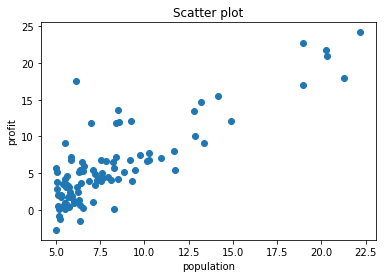

In [146]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Scatter plot')
plt.xlabel('population')
plt.ylabel('profit')
plt.scatter(df.loc[:,'population'], df.loc[:,'profit'])
plt.show()

In [250]:
def compute_cost(x, y, t):   
    m = y.size
    inner = x @ t.T - y
    ret = inner.T @ inner / (2*m)  
    return ret

In [148]:
theta = np.zeros(2)
m = y.shape[0]
compute_cost(x,y,theta)

32.07273387745567

## Gradient descent
update theta, the cost is decreasing with each step.

In [161]:
def gradient_descent(x, y, theta): 
    _theta = theta.copy()
    cost_l = np.empty(iterations)
    m = y.shape[0]
    
    for i in range(iterations):
        cost_l[i] = compute_cost(x,y,_theta)   
        inner = x @ _theta.T - y       
        p_count = _theta.size
        
        for j in range(p_count):
            _theta[j] = _theta[j] - alpha * (1/m) * (x[:, j] @  inner)
            
    return _theta, cost_l

In [150]:
iterations = 1500
alpha = 0.01

In [151]:
final_theta, cost_l = gradient_descent(x, y, theta)
final_theta

array([-3.63029144,  1.16636235])

In [152]:
predict1 = [1, 3.5] @ final_theta
predict2 = [1, 7] @ final_theta
print(predict1, predict2)

0.4519767867701763 4.534245012944713


绘制图形，观察拟合效果

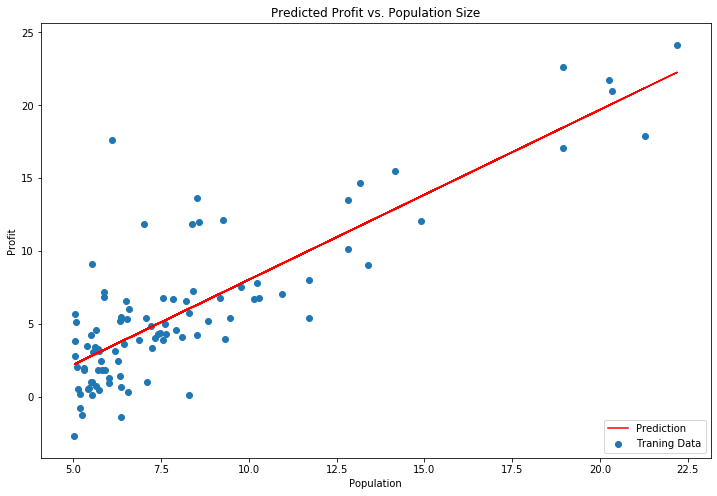

In [153]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(tmx, final_theta[0]+final_theta[1]*tmx, 'r', label='Prediction')
ax.scatter(tmx, y, label='Traning Data')
ax.legend(loc=4)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## Linear regression with multiple variables
The file *ex1data2.txt* contains a training set of housing prices in Port-land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

### Feature normalization

In [241]:
df2 = pd.read_table(r'.\data\ex1data2.txt',sep=',', names=['size','bedroom','price'])
df2.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [242]:
def normalization(x):
    cols = x.shape[1]
    p_mean = []
    p_std = []
    _x = x.copy()
    for i in range(cols):
        p_mean.append(np.mean(_x[: ,i]))
        p_std.append(np.std(_x[: ,i]))
        _x[:, i] = (_x[:, i] - np.mean(_x[: ,i])) / np.std(_x[: ,i])        
    return _x, p_mean, p_std

In [254]:
l2 = df2.shape[0]
_x2 = df2.loc[:,['size','bedroom']].astype('float64').to_numpy()
_y2 = df2.loc[:, 'price'].astype('float64').to_numpy().reshape(l2,1)
x_nor, p_mean, p_std = normalization(_x2)
y_nor, yp_mean, yp_std = normalization(_y2)
x2 = np.concatenate((np.ones((l2,1)), x_nor), axis=1)
y2 = y_nor.reshape(l2)

In [264]:
theta2 = np.zeros(3)
iterations = 1500
alpha = 0.01
compute_cost(x2,y2,theta2)

0.5

In [265]:
final_theta2, cost_l2 = gradient_descent(x2, y2, theta2)
final_theta2

array([-8.31486180e-17,  8.84137547e-01, -5.25503786e-02])

In [267]:
cost_l2

array([0.5       , 0.49080152, 0.48186894, ..., 0.13352767, 0.13352767,
       0.13352767])

## normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [258]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [263]:
tmp_theta = normalEqn(x2, y2)
tmp_theta

array([-6.93889390e-17,  8.84765988e-01, -5.31788197e-02])